In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 200)
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.impute import KNNImputer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn import datasets

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn import neighbors
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from yellowbrick.regressor import CooksDistance

import math
import shap

import warnings
warnings.filterwarnings("ignore")

# Apply the default theme
sns.set()



OSError: dlopen(/Users/keithlowton/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/keithlowton/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [ ]:
data = pd.read_csv('Car details v3.csv')
print("Dataset has {} entries and {} features".format(*data.shape))

In [ ]:
data.columns = [i.replace(' ','_').lower() for i in data.columns]

<h3> Clean data

In [401]:
data['engines'] = data['engine'].str.extract('(\d+)', expand=False)
data['engine_unit'] = data['engine'].str.replace('\d+', '')
data['engines'] = pd.to_numeric(data['engines'], errors='coerce')

data['mileages'] = data['mileage'].str.extract('(\d+)', expand=False).astype(float)
data['mileage_unit'] = data['mileage'].str.replace('\d+', '')
#data['mileage_c'] = data['mileages']
#data.loc[data['mileage_unit'] == '. km/kg','mileage_c'] = data['mileages']/0.0016747
         
data['max_powers'] = data['max_power'].str.extract('(\d+)', expand=False).astype(float)
data['max_power_unit'] = data['max_power'].str.replace('\d+', '')

In [402]:
data['torques'] = data['torque'].str.split('@', expand=False)

#data.loc[:, 'torquess'] = data['torques'].map(lambda x: x[[0]])
data['torquess'] = data['torques'].str[0]

data['names'] = data['name'].str.split(' ', expand=False)
data['names1'] = data['names'].str[0]

In [403]:
a = pd.crosstab(data['names1'],columns='count')
a['name'] = a.index

data['names1_c'] = data['names1']
data.loc[data['names1_c'].isin(list(a['name'][a['count'] < 20])),'names1_c'] = 'Other'

In [404]:
data = data.drop(['max_power_unit','mileage_unit','engine_unit','name','names1','names'],axis=1)

In [405]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,engines,mileages,max_powers,torques,torquess,names1_c
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1248.0,23.0,74.0,"[190Nm, 2000rpm]",190Nm,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1498.0,21.0,103.0,"[250Nm, 1500-2500rpm]",250Nm,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,1497.0,17.0,78.0,"[12.7, 2,700(kgm, rpm)]",12.7,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1396.0,23.0,90.0,[22.4 kgm at 1750-2750rpm],22.4 kgm at 1750-2750rpm,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1298.0,16.0,88.0,"[11.5, 4,500(kgm, rpm)]",11.5,Maruti


In [406]:
#print(f" Dataset has {len(set(data.name))} unique name sources")
print(f" Dataset has {len(set(data['seller_type']))} unique seller types")
print(f" Dataset has {len(set(data.fuel))} unique fuels")
print(f" Dataset has {len(set(data.owner))} unique owners")

 Dataset has 3 unique seller types
 Dataset has 4 unique fuels
 Dataset has 5 unique owners


In [407]:
#pd.crosstab(data.yearstart,data.yearend)
#pd.crosstab(data.locationabbr,data.locationdesc)
#pd.crosstab(data.classid,data['class'])
#pd.crosstab(data.topicid,data['topic'])
#pd.crosstab(data.questionid,data['question'])
#pd.crosstab(data.locationid,data.locationdesc)

In [408]:
#set(data.question)

In [409]:
#list(data.columns)

In [410]:
#data.loc[:,data.columns.str.startswith('data_value')].head()

<h3> Summary of the data

In [411]:
def data_eda(df):
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()*100
    eda_df['dtypes'] = df.dtypes
    eda_df['unique'] = df.nunique()
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    eda_df['std'] = df.std()
    
    return pd.DataFrame(eda_df)

In [412]:
data = data.drop(['max_power','mileage','engine','torquess','torques','torque'],axis=1)

In [413]:
data_edas = data_eda(data)
data_edas

,null_sum,null_pct,dtypes,unique,count,mean,median,min,max,std
engines,221,2.718996,float64,121,7907,1458.625016,1248.0,624,3604,503.916303
fuel,0,0.000000,object,4,8128,NaN,NaN,CNG,Petrol,NaN
km_driven,0,0.000000,int64,921,8128,69819.510827,60000.0,1,2360457,56550.554958
max_powers,216,2.657480,float64,144,7912,91.201845,82.0,0,400,35.807493
mileages,221,2.718996,float64,25,7907,18.979891,19.0,0,42,4.065362
names1_c,0,0.000000,object,22,8128,NaN,NaN,Audi,Volvo,NaN
owner,0,0.000000,object,5,8128,NaN,NaN,First Owner,Third Owner,NaN
seats,221,2.718996,float64,9,7907,5.416719,5.0,2,14,0.959588
seller_type,0,0.000000,object,3,8128,NaN,NaN,Dealer,Trustmark Dealer,NaN
selling_price,0,0.000000,int64,677,8128,638271.807702,450000.0,29999,10000000,806253.403508


<h3> Check for missing data

In [414]:
data.isna().mean().round(4) * 100

year             0.00
selling_price    0.00
km_driven        0.00
fuel             0.00
seller_type      0.00
transmission     0.00
owner            0.00
seats            2.72
engines          2.72
mileages         2.72
max_powers       2.66
names1_c         0.00
dtype: float64

<h3> Impute missing values

In [415]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('selling_price')

In [416]:
cat_cols = list(set(data.columns) - set(num_cols))
cat_cols

['owner', 'names1_c', 'transmission', 'seller_type', 'fuel', 'selling_price']

In [417]:
mod_list = (set(cat_cols) - set(['torque','selling_price']))
cat_data = data[mod_list]

def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

mod_trans = dummy_df(cat_data, mod_list)

In [418]:
model_data_orig = pd.concat([data[num_cols],mod_trans],axis=1)
Y_data = data.selling_price.astype(int)
#model_data.shape
#list(model_data.columns)

In [419]:
model_data_arr = model_data_orig.values
preprocessor = KNNImputer(n_neighbors=5, weights='distance')
preprocessor.fit(model_data_arr)
data_prep = preprocessor.transform(model_data_arr)

In [420]:
data_prep_df = pd.DataFrame(data_prep)
data_prep_df.columns = model_data.columns
#data_prep_df.head()

In [421]:
#data_prep_df.isna().mean().round(4) * 100
data_edas = data_eda(data[['seats','engines','mileages','max_powers']])
#print(data_edas)
data_edas = data_eda(data_prep_df[['seats','engines','mileages','max_powers']])
#print(data_edas)

<h3> Correlated features

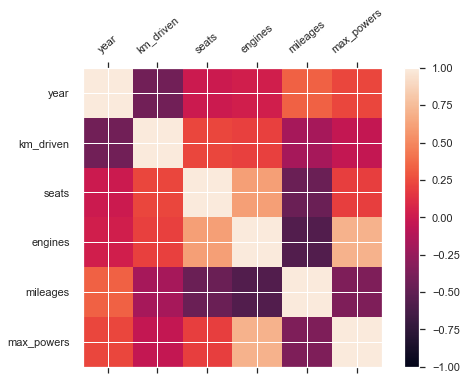

In [422]:
correlations = data_prep_df[num_cols].corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(num_cols),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(num_cols, rotation=40)
ax.set_yticklabels(num_cols)
plt.show()

In [423]:
#correlations[correlations > 0.8]

<h3> Multicollinearity - VIF

In [424]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [425]:
vif = calculate_vif(data_prep_df[num_cols])
#while vif['VIF'][vif['VIF'] > 10].any():
#    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
#    print(remove)
#    features.drop(remove,axis=1,inplace=True)
#    vif = calculate_vif(features)
    
vif 

,Features,VIF
0,year,120.634457
1,km_driven,2.843116
2,seats,66.392442
3,engines,40.198465
4,mileages,35.507945
5,max_powers,19.317390


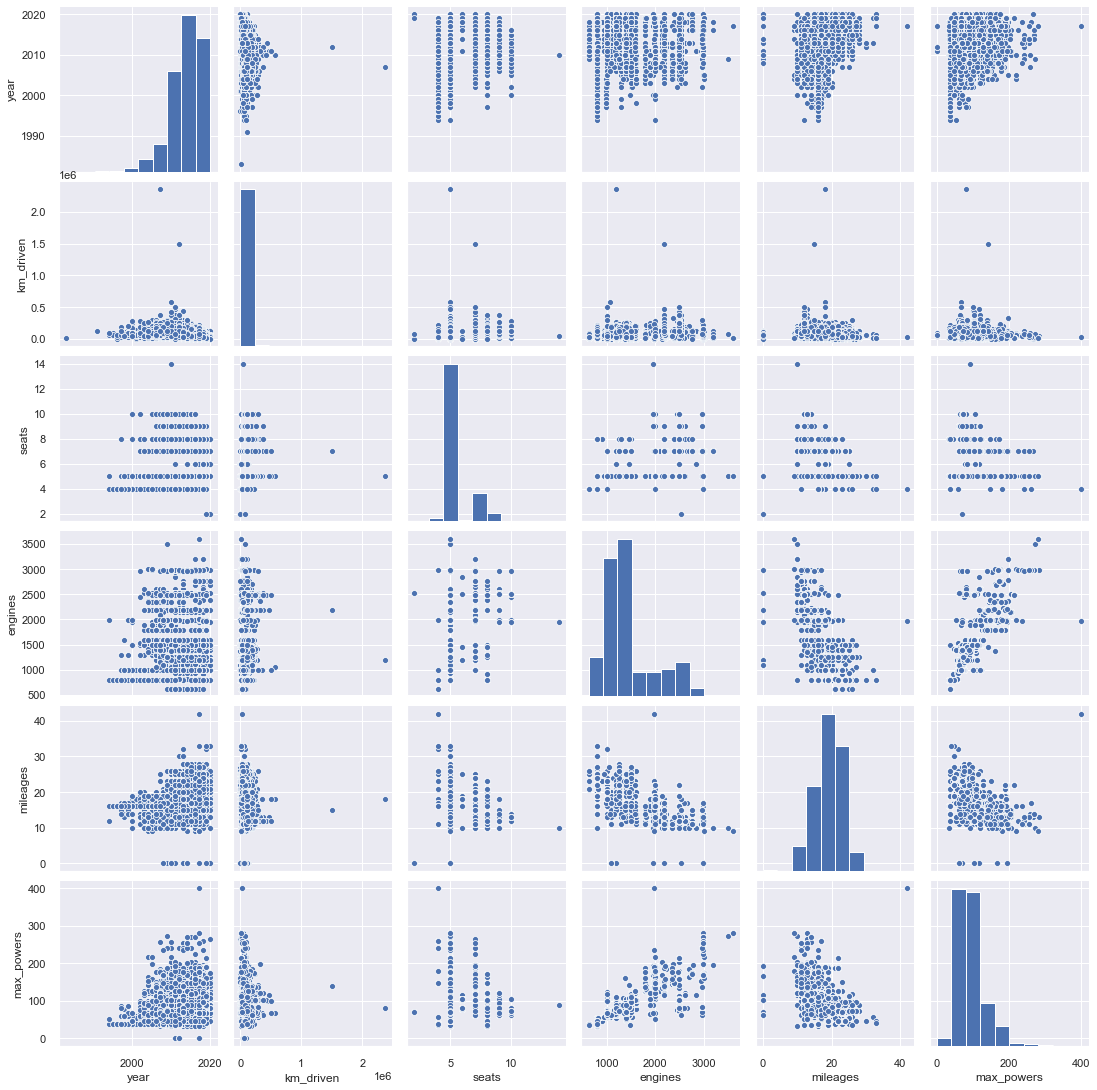

In [426]:
sns.pairplot(data[num_cols])

In [428]:
model_data = pd.concat([data_prep_df[num_cols],mod_trans],axis=1)

In [430]:
#model_data.describe()

<h3> Test-train split

In [429]:
model_data.columns = [i.replace(' ','_').lower() for i in model_data.columns]
#list(model_data.columns)

In [432]:
X_train, X_test, y_train, y_test = train_test_split(model_data, Y_data, test_size=0.3, random_state=3)

In [433]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5689, 42) (2439, 42) (5689,) (2439,)


<h3> Standardisation and normalisation

In [427]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scale = X_train.copy()
X_train_scale[num_cols] = min_max_scaler.fit_transform(X_train[num_cols])

X_test_scale = X_test.copy()
X_test_scale[num_cols] = min_max_scaler.fit_transform(X_test[num_cols])

#model_data_scaled = pd.concat([X_data,mod_trans],axis=1)
print(X_train.shape,X_test.shape) # (41188, 61)

In [431]:
vif = calculate_vif(model_data[num_cols])
vif 

,Features,VIF
0,year,77.322696
1,km_driven,3.006231
2,seats,24.508790
3,engines,15.790670
4,mileages,37.756335
5,max_powers,19.915383


In [434]:
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(X_train, y_train)
perm = PermutationImportance(my_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0759 ± 0.0029,year
0.0580 ± 0.0071,km_driven
0.0234 ± 0.0062,max_powers
0.0148 ± 0.0039,mileages
0.0051 ± 0.0013,seller_type_trustmark_dealer
0.0047 ± 0.0012,seller_type_dealer
0.0034 ± 0.0015,seller_type_individual
0.0032 ± 0.0035,engines
0.0016 ± 0.0028,seats
0.0014 ± 0.0021,owner_second_owner


<h3> Lasso regression

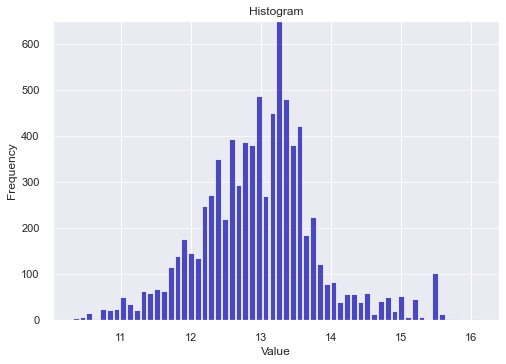

In [435]:
a = Y_data.apply(lambda x: float(math.log(x)))
X_train, X_test, y_train, y_test = train_test_split(model_data, a, test_size=0.3, random_state=3)

### Histogram of response variable ###

n, bins, patches = plt.hist(x=a, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

In [436]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lasso = Lasso(max_iter=10000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, y_train)
print(f"The RMSE is {np.sqrt(metrics.mean_squared_error(y_test,lasso.predict(X_test))):.2f}")

Alpha= 7.989695094078014e-06
The RMSE is 0.26


In [437]:
y1_l = lassocv.predict(X_train)
y1_l = list(y1_l)
y2_l = lassocv.predict(X_test)
y2_l = list(y2_l)

error=0
for i in range(len(y_train)):
    error += (abs(y1_l[i]-y_Train[i])/y_Train[i])
train_error_l = error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_rf)+" percent"+" in Lasso Regressor")

error=0
for i in range(len(y_test)):
    error += (abs(y2_l[i]-Y_test[i])/Y_test[i])
test_error_l = error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_rf)+" percent in Lasso Regressor")

Train error = 0.45661749619272385 percent in Lasso Regressor
Test error = 1.1422232926315674 percent in Lasso Regressor


In [438]:
rmse_l = np.sqrt(metrics.mean_squared_error(y_test,lassocv.predict(X_test)))
print(f"The RMSE is {rmse_l:.2f}")

The RMSE is 0.26


<h4> Residual versus predicted plot

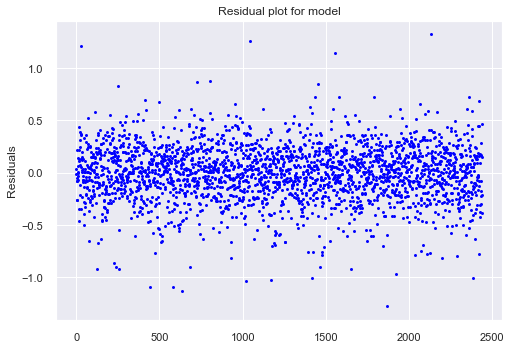

In [439]:
residual = y_test - lasso.predict(X_test)
y_preds = pd.Series(lasso.predict(X_test))
y_preds.index = range(0,len(y_preds))
residual.index = range(0,len(residual))
a = pd.concat([residual,y_preds],axis=1,ignore_index=True)
resid_data = pd.DataFrame(a)
resid_data.columns = ['Residuals','Predicted']
plt.plot(resid_data['Residuals'], 'o', color='blue', markersize=3)
plt.title('Residual plot for model')
plt.ylabel('Residuals')
plt.show()

<h4> Residual versus predicted with distribution plot 

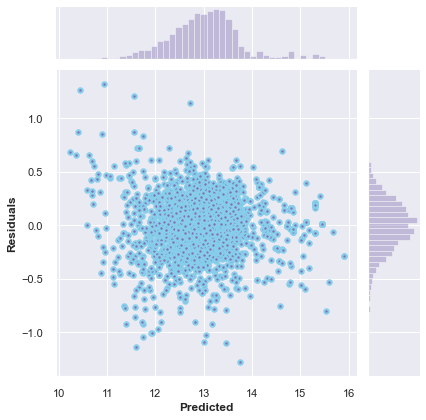

In [319]:
ax = sns.jointplot(x=resid_data['Predicted'], y=resid_data['Residuals'], kind='scatter', s=20, color='m', edgecolor="skyblue", linewidth=2)
ax.ax_joint.set_xlabel('Predicted', fontweight='bold')
ax.ax_joint.set_ylabel('Residuals', fontweight='bold')
plt.show()

<h4> Coefficients

In [320]:
coefs = pd.Series(lasso.coef_, index=X_train.columns)
coefs = pd.DataFrame(coefs)
coefs.columns = ['Coefficients']
coefs['Transformed_Coefficients'] = coefs['Coefficients'].apply(lambda x: float((math.exp(x)))) 

In [321]:
poscoefs = coefs[coefs['Coefficients'] > 0]
poscoefs = poscoefs.sort_values(by='Coefficients',ascending=False)
poscoefs[:20]

,Coefficients,Transformed_Coefficients
year,4.159329,64.028525
max_powers,3.303263,27.201263
owner_test_drive_car,0.793915,2.212040
names1_c_lexus,0.707073,2.028046
names1_c_bmw,0.562060,1.754282
names1_c_mercedes-benz,0.472921,1.604674
engines,0.440066,1.552810
names1_c_volvo,0.424515,1.528849
names1_c_jaguar,0.422160,1.525253
seats,0.296102,1.344608


In [322]:
negcoefs = coefs[coefs['Coefficients'] <= 0]
negcoefs = negcoefs.sort_values(by='Coefficients',ascending=True)
negcoefs[:20]

,Coefficients,Transformed_Coefficients
km_driven,-0.814455,0.442881
names1_c_tata,-0.416452,0.659382
names1_c_chevrolet,-0.349991,0.704695
names1_c_datsun,-0.318209,0.727451
names1_c_fiat,-0.241372,0.785549
mileages,-0.109172,0.896576
names1_c_ford,-0.065947,0.936181
fuel_cng,-0.065691,0.936420
owner_fourth_&_above_owner,-0.058834,0.942864
names1_c_renault,-0.055420,0.946088


<h4> Q-Q Plot

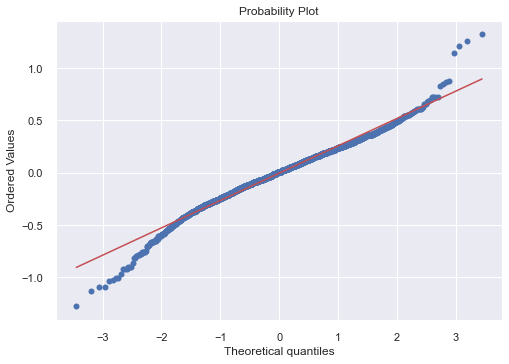

In [323]:
import scipy.stats as stats
import pylab 
stats.probplot(resid_data['Residuals'], dist="norm", plot=pylab)
pylab.show()

<h3> KNN Regression

In [440]:
n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)
y1_knn = knn.predict(X_train)
y1_knn = list(y1_knn)
y2_knn = knn.predict(X_test)
y2_knn = list(y2_knn)

error=0
for i in range(len(y_train)):
    error += (abs(y1_knn[i]-y_Train[i])/y_Train[i])
train_error_knn = error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_knn)+" percent"+" in Knn algorithm")

y2_knn = knn.predict(X_test)
y2_knn = list(y2_knn)
error = 0
for i in range(len(y_test)):
    error += (abs(y2_knn[i]-Y_test[i])/Y_test[i])
test_error_knn = error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_knn)+" percent"+" in knn algorithm")

Train error = 1.1738449240594193 percent in Knn algorithm
Test error = 1.3389803048415967 percent in knn algorithm


In [441]:
rmse_knn = np.sqrt(metrics.mean_squared_error(y_test,knn.predict(X_test)))
print(f"The RMSE is {rmse_knn:.2f}")

The RMSE is 0.27


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in Knn')

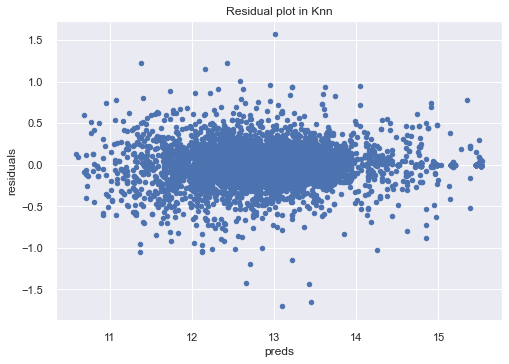

In [442]:
preds = pd.DataFrame({"preds":knn.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Knn")

<h3> Bayesian Regression

In [443]:
breg = linear_model.BayesianRidge()
breg.fit(X_train,y_train)
y1_reg = breg.predict(X_train)
y1_reg = list(y1_reg)
y2_reg = breg.predict(X_test)
y2_reg = list(y2_reg)

error=0
for i in range(len(y_train)):
    error += (abs(y1_reg[i]-y_Train[i])/y_Train[i])
train_error_breg = error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_bay)+" percent"+" in Bayesian Regression")

error=0
for i in range(len(y_test)):
    error += (abs(y2_reg[i]-Y_test[i])/Y_test[i])
test_error_breg = (error/len(Y_test))*100
print("Test error = "+'{}'.format(test_error_bay)+" percent"+" in Bayesian Regression")

Train error = 1.5030779486093766 percent in Bayesian Regression
Test error = 0.02266577839005217 percent in Bayesian Regression


In [444]:
rmse_breg = np.sqrt(metrics.mean_squared_error(y_test,breg.predict(X_test)))
print(f"The RMSE is {rmse_breg:.2f}")

The RMSE is 0.26


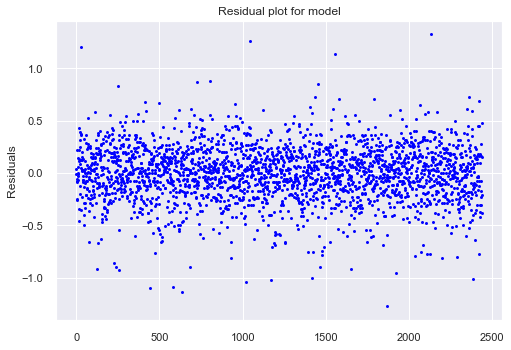

In [445]:
residual = y_test - reg.predict(X_test)
y_preds = pd.Series(reg.predict(X_test))
y_preds.index = range(0,len(y_preds))
residual.index = range(0,len(residual))
a = pd.concat([residual,y_preds],axis=1,ignore_index=True)
resid_data = pd.DataFrame(a)
resid_data.columns = ['Residuals','Predicted']
plt.plot(resid_data['Residuals'], 'o', color='blue', markersize=3)
plt.title('Residual plot for model')
plt.ylabel('Residuals')
plt.show()

<h3> Decision Tree Regressor

In [446]:
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(X_train,y_train)
y1_dec = dec.predict(X_train)
y1_dec = list(y1_dec)
y2_dec = dec.predict(X_test)
y2_dec = list(y2_dec)

error=0
for i in range(len(y_train)):
    error += (abs(y1_dec[i]-y_Train[i])/y_Train[i])
train_error_tree = error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_tree)+" percent"+" in Decision Tree Regressor")

error=0
for i in range(len(y_test)):
    error += (abs(y2_dec[i]-Y_test[i])/Y_test[i])
test_error_tree = error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_tree)+" percent in Decision Tree Regressor")

Train error = 3.778590478683288 percent in Decision Tree Regressor
Test error = 3.5292830711682406 percent in Decision Tree Regressor


In [447]:
rmse_dec = np.sqrt(metrics.mean_squared_error(y_test,dec.predict(X_test)))
print(f"The RMSE is {rmse_dec:.2f}")

The RMSE is 0.68


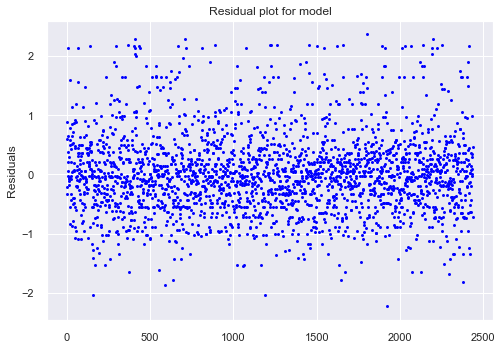

In [448]:
residual = y_test - dec.predict(X_test)
y_preds = pd.Series(dec.predict(X_test))
y_preds.index = range(0,len(y_preds))
residual.index = range(0,len(residual))
a = pd.concat([residual,y_preds],axis=1,ignore_index=True)
resid_data = pd.DataFrame(a)
resid_data.columns = ['Residuals','Predicted']
plt.plot(resid_data['Residuals'], 'o', color='blue', markersize=3)
plt.title('Residual plot for model')
plt.ylabel('Residuals')
plt.show()

<h3> SVM

In [449]:
svm_reg = svm.SVR()
svm_reg.fit(X_train,y_train)
y1_svm = svm_reg.predict(X_train)
y1_svm = list(y1_svm)
y2_svm = svm_reg.predict(X_test)
y2_svm = list(y2_svm)

error=0
for i in range(len(y_train)):
    error += (abs(y1_svm[i]-y_Train[i])/y_Train[i])
train_error_svm = error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_svm)+" percent"+" in SVM Regressor")

error=0
for i in range(len(y_test)):
    error += (abs(y2_svm[i]-Y_test[i])/Y_test[i])
test_error_svm = error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_svm)+" percent in SVM Regressor")

Train error = 1.3301754104978274 percent in SVM Regressor
Test error = 0.6206276799813997 percent in SVM Regressor


In [450]:
rmse_svm = np.sqrt(metrics.mean_squared_error(y_test,svm_reg.predict(X_test)))
print(f"The RMSE is {rmse_svm:.2f}")

The RMSE is 0.24


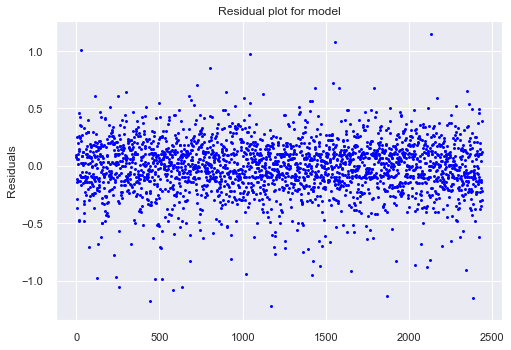

In [451]:
residual = y_test - svm_reg.predict(X_test)
y_preds = pd.Series(svm_reg.predict(X_test))
y_preds.index = range(0,len(y_preds))
residual.index = range(0,len(residual))
a = pd.concat([residual,y_preds],axis=1,ignore_index=True)
resid_data = pd.DataFrame(a)
resid_data.columns = ['Residuals','Predicted']
plt.plot(resid_data['Residuals'], 'o', color='blue', markersize=3)
plt.title('Residual plot for model')
plt.ylabel('Residuals')
plt.show()

<h3> Random Forest regressor

In [452]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
rf_regressor.fit(X_train,y_train)
y1_rf = rf_regressor.predict(X_train)
y1_rf = list(y1_rf)
y2_rf = rf_regressor.predict(X_test)
y2_rf = list(y2_rf)

error=0
for i in range(len(y_train)):
    error += (abs(y1_rf[i]-y_Train[i])/y_Train[i])
train_error_rf = error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_rf)+" percent"+" in SVM Regressor")

error=0
for i in range(len(y_test)):
    error += (abs(y2_rf[i]-Y_test[i])/Y_test[i])
test_error_rf = error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_rf)+" percent in SVM Regressor")

Train error = 0.45661749619272385 percent in SVM Regressor
Test error = 1.1422232926315674 percent in SVM Regressor


In [453]:
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test,rf_regressor.predict(X_test)))
print(f"The RMSE is {rmse_rf:.2f}")

The RMSE is 0.22


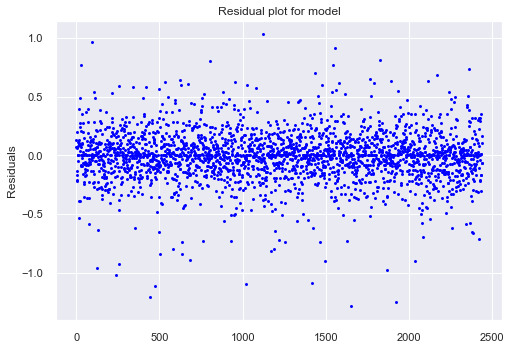

In [454]:
residual = ()
y_preds = ()
residual = y_test - rf_regressor.predict(X_test)
y_preds = pd.Series(rf_regressor.predict(X_test))
y_preds.index = range(0,len(y_preds))
residual.index = range(0,len(residual))
a = pd.concat([residual,y_preds],axis=1,ignore_index=True)
resid_data = pd.DataFrame(a)
resid_data.columns = ['Residuals','Predicted']
plt.plot(resid_data['Residuals'], 'o', color='blue', markersize=3)
plt.title('Residual plot for model')
plt.ylabel('Residuals')
plt.show()

<h3> XG Boost regressor

In [455]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
y1_xgb = xg_reg.predict(X_train)
y1_xgb = list(y1_rf)
y2_xgb = xg_reg.predict(X_test)
y2_xgb = list(y2_rf)

error=0
for i in range(len(y_train)):
    error += (abs(y1_xgb[i]-y_Train[i])/y_Train[i])
train_error_xgb = error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_xgb)+" percent"+" in XGBoost Regressor")

error=0
for i in range(len(y_test)):
    error += (abs(y2_xgb[i]-Y_test[i])/Y_test[i])
test_error_xgb = error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_xgb)+" percent in XGBoost Regressor")

Train error = 0.45661749619272385 percent in XGBoost Regressor
Test error = 1.1422232926315674 percent in XGBoost Regressor


In [456]:
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test,xg_reg.predict(X_test)))
print(f"The RMSE is {rmse_xgb:.2f}")

The RMSE is 4.43


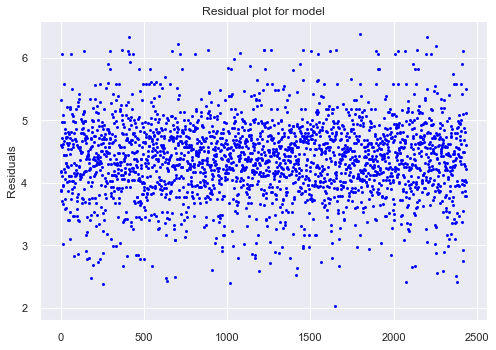

In [457]:
residual = ()
y_preds = ()
residual = y_test - xg_reg.predict(X_test)
y_preds = pd.Series(xg_reg.predict(X_test))
y_preds.index = range(0,len(y_preds))
residual.index = range(0,len(residual))
a = pd.concat([residual,y_preds],axis=1,ignore_index=True)
resid_data = pd.DataFrame(a)
resid_data.columns = ['Residuals','Predicted']
plt.plot(resid_data['Residuals'], 'o', color='blue', markersize=3)
plt.title('Residual plot for model')
plt.ylabel('Residuals')
plt.show()

<h3> XG Boost Cross Validation

In [458]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [459]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.292887
Name: test-rmse-mean, dtype: float64


<h3> XGBoost bayesian optimisation

In [474]:
pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (100, 1000),
    'max_depth': (3,10),
    'subsample': (1.0, 1.0),  # Change for big datasets
    'colsample': (1.0, 1.0),  # Change for datasets with lots of features
    'gamma': (0, 5)}

def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        colsample,
                        gamma):
    
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    clf = xgb.XGBRegressor(max_depth=max_depth,
                           learning_rate=learning_rate,
                           n_estimators=n_estimators,
                           gamma=gamma)
    y_preds = pd.Series(clf.predict(X_test))
    return cross_val_score(clf,
                           X_train,
                           y_train,
                           cv=5).mean()

optimizer = BayesianOptimization(f=xgboost_hyper_param,
                                 pbounds=pbounds,
                                 random_state=1,)

optimizer.maximize()

print('Final Results')
print('XGBOOST: %f' % optimizer.res['max']['max_val'])

|   iter    |  target   | colsample |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


XGBoostError: need to call fit or load_model beforehand

In [486]:
#import tvm

def xgboostcv(max_depth,
              learning_rate,
              n_estimators,
              gamma,
              min_child_weight,
              max_delta_step,
              subsample,
              colsample_bytree,
              reg_alpha,
              reg_lambda,
              silent=True,
              nthread=-1,
              random_state=1):
    return cross_val_score(xgb.XGBRegressor(max_depth=int(max_depth),
                                             learning_rate=learning_rate,
                                             n_estimators=int(n_estimators),
                                             silent=silent,
                                             nthread=nthread,
                                             gamma=gamma,
                                             min_child_weight=min_child_weight,
                                             max_delta_step=max_delta_step,
                                             subsample=subsample,
                                             colsample_bytree=colsample_bytree,
                                             reg_alpha=reg_alpha,
                                             reg_lambda = reg_lambda),
                           X_train,
                           y_train,
                           cv=5).mean()

xgboostBO = BayesianOptimization(xgboostcv,
                                 {'max_depth': (2, 10),
                                  'learning_rate': (0.01, 1),
                                  'n_estimators': (1000, 2500),
                                  'gamma': (0, 5),
                                  'min_child_weight': (1, 10),
                                  'max_delta_step': (0, 0.1),
                                  'subsample': (1.0, 1.0),
                                  'colsample_bytree' :(0.1, 0.99),
                                  'reg_alpha':(0.1, 0.5),
                                  'reg_lambda':(0.1, 0.9)
                                  })


xgboostBO.maximize()

|   iter    |  target   | colsam... |   gamma   | learni... | max_de... | max_depth | min_ch... | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------
[21:21:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:21:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  

[21:22:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  4        |  0.8954   |  0.4923   |  1.74     |  0.8655   |  0.01447  |  4.559    |  8.322    |  1.45e+03 |  0.4423   |  0.155    |  1.0      |
[21:22:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:22:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/sr

[21:24:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:24:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  8        |  0.9213   |  0.2489   |  0.9428   |  0.6341   |  0.02413  |  9.675    |  9.268    |  1.609e+0 |  0.2414   |  0.322    |  1.0      |
[21:24:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/sr

[21:26:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:26:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:26:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings

[21:28:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:28:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:28:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings

[21:31:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:31:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:31:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings

[21:33:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:33:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:33:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings

[21:35:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:35:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:35:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings

TypeError: list indices must be integers or slices, not str

In [487]:
print(xgboostBO.max)

{'target': 0.9291438770401823, 'params': {'colsample_bytree': 0.8996987507987781, 'gamma': 0.08338939272881374, 'learning_rate': 0.7651813247826751, 'max_delta_step': 0.07507832286947819, 'max_depth': 2.1528924260862246, 'min_child_weight': 9.375196707742049, 'n_estimators': 1852.5246892372786, 'reg_alpha': 0.2362355178636297, 'reg_lambda': 0.2718604739624733, 'subsample': 1.0}}


In [488]:
#print(xgboostBO.res)

[{'target': -6.39235855302636, 'params': {'colsample_bytree': 0.14074392836685784, 'gamma': 4.084738012216654, 'learning_rate': 0.6483632833903795, 'max_delta_step': 0.014206251778520662, 'max_depth': 4.148084731926949, 'min_child_weight': 3.3537620758935174, 'n_estimators': 1123.2875454082339, 'reg_alpha': 0.38725166835301217, 'reg_lambda': 0.7113919615014476, 'subsample': 1.0}}, {'target': 0.9120953910011259, 'params': {'colsample_bytree': 0.19000154845262462, 'gamma': 1.3290351539062795, 'learning_rate': 0.7241333806343648, 'max_delta_step': 0.0874844958325593, 'max_depth': 9.198225126890666, 'min_child_weight': 9.773144114287957, 'n_estimators': 1274.0972926600384, 'reg_alpha': 0.4645782506471431, 'reg_lambda': 0.7479987907468034, 'subsample': 1.0}}, {'target': 0.9125758883101793, 'params': {'colsample_bytree': 0.21136624858646605, 'gamma': 2.305268710029398, 'learning_rate': 0.5088460853616658, 'max_delta_step': 0.05282850794484938, 'max_depth': 4.948387662756635, 'min_child_weigh

In [ ]:
xgboost_bayes = XGBClassifier(max_depth=int(optimizer.max['params']['max_depth']),
                              learning_rate=optimizer.max['params']['learning_rate'],
                              n_estimators=int(optimizer.max['params']['n_estimators']),
                              gamma=optimizer.max['params']['gamma'])
xgboost_bayes.fit(X_train, y_train)

<h3> Comparison

In [460]:
train_error = [train_error_l,train_error_knn,train_error_bay,train_error_tree,train_error_svm,train_error_rf,train_error_xgb]
test_error = [test_error_l,test_error_knn,test_error_bay,test_error_tree,test_error_svm,test_error_rf,test_error_xgb]
rmse = [rmse_l,rmse_knn,rmse_breg,rmse_dec,rmse_svm,rmse_rf,rmse_xgb]

col = {'Train Error':train_error,'Test Error':test_error, 'RMSE':rmse}
models = ['Lasso','Knn','Bayesian Regression','Decision Tree','SVM','RF Regressor','XG Boost regressor']
df = pd.DataFrame(data=col,index=models)
df

,Train Error,Test Error,RMSE
Lasso,1.503426,0.000000,0.263721
Knn,1.173845,1.338980,0.273405
Bayesian Regression,1.503078,0.022666,0.263644
Decision Tree,3.778590,3.529283,0.677794
SVM,1.330175,0.620628,0.244574
RF Regressor,0.456617,1.142223,0.218082
XG Boost regressor,0.456617,1.142223,4.426719


<h3> Cook's distance

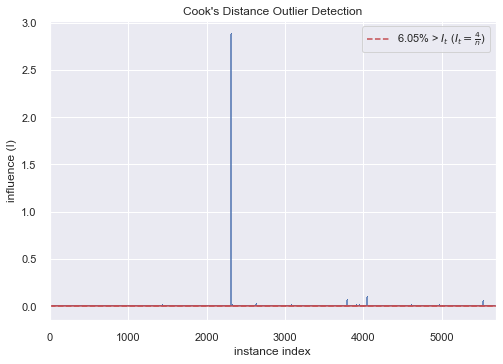

In [468]:
visualizer = CooksDistance()
visualizer.fit(X_train, y_train)
visualizer.show()
plt.show()

<h3> RF Feature Importance

In [469]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

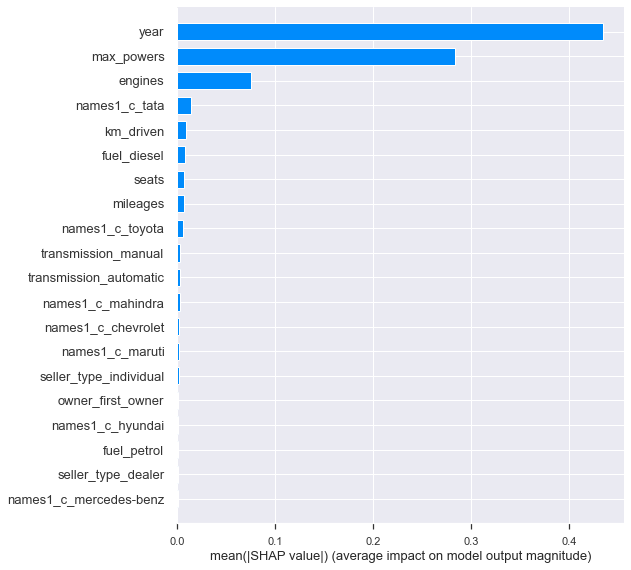

In [470]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

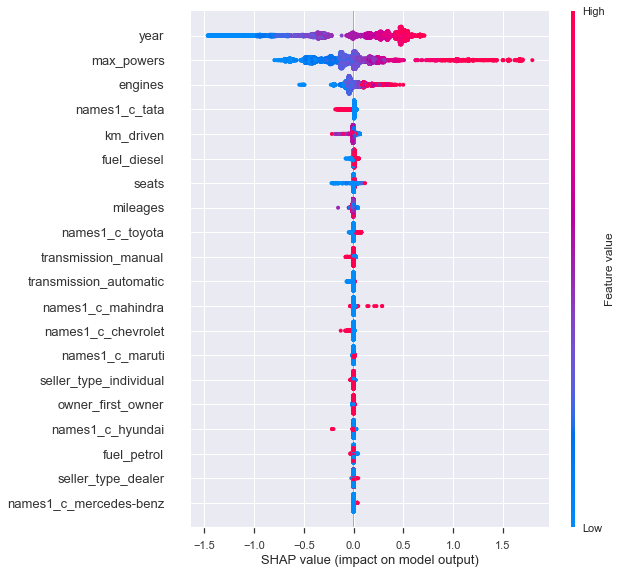

In [471]:
f = plt.figure()
shap.summary_plot(shap_values, X_train)